# Term Deposit Sale

In [ ]:
git repository: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-embedevelop/tree/master/EnsembleTechniques-TermDepositSale

## Objective

Using the data from exiting customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ration

## Input variables:
## bank client data:
* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* balance in account
## related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the month (categorical: 1, 2, 3 ...)
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Output variable (desired target):
* Target: Tell us has the client subscribed a term deposit (Yes, No)

In [3255]:
import warnings
warnings.filterwarnings('ignore')

In [3256]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer 

# -> Explorator data Analysis

In [3257]:
# importing data

df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3258]:
df.shape

(45211, 17)

## 1. Univariate Analysis

## a. Univariate Analysis

## Data types inpdependent attributes

In [3259]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Description of independent attributes

In [3260]:
# Statistical summary 
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
age,45211.00,40.94,10.62,18.00,33.00,39.00,48.00,56.00,59.00,71.00,95.00
balance,45211.00,1362.27,3044.77,-8019.00,72.00,448.00,1428.00,3574.00,5768.00,13164.90,102127.00
day,45211.00,15.81,8.32,1.00,8.00,16.00,21.00,28.00,29.00,31.00,31.00
duration,45211.00,258.16,257.53,0.00,103.00,180.00,319.00,548.00,751.00,1269.00,4918.00
campaign,45211.00,2.76,3.10,1.00,1.00,2.00,3.00,5.00,8.00,16.00,63.00
pdays,45211.00,40.20,100.13,-1.00,-1.00,-1.00,-1.00,185.00,317.00,370.00,871.00
previous,45211.00,0.58,2.30,0.00,0.00,0.00,0.00,2.00,3.00,8.90,275.00


## Analysis of the body of distributions / tails, missing values, outliers

In [3261]:
# check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [3262]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

## Value counts of all categorical columns

In [3263]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'Target']
df[categories] = df[categories].astype('category')

In [3264]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [3265]:
for i in list(df.columns[df.dtypes == 'category']):
    print(df[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     93

In [3266]:
labels = pd.crosstab(df['Target'], df['job'], normalize='all')

In [3267]:
job_map = {k:i for i, k in enumerate (labels, 1)}
df['job'] = df['job'].map(job_map)

In [3268]:
labels = pd.crosstab(df['Target'], df['marital'], normalize='all')

In [3269]:
marital_map = {k:i for i, k in enumerate (labels, 1)}
df['marital'] = df['marital'].map(marital_map)

In [3270]:
labels = pd.crosstab(df['Target'], df['education'], normalize='all')

In [3271]:
education_map = {k:i for i, k in enumerate (labels, 1)}
df['education'] = df['education'].map(education_map)

In [3272]:
labels = pd.crosstab(df['Target'], df['default'], normalize='all')

In [3273]:
default_map = {k:i for i, k in enumerate (labels, 1)}
df['default'] = df['default'].map(default_map)

In [3274]:
labels = pd.crosstab(df['Target'], df['housing'], normalize='all')

In [3275]:
housing_map = {k:i for i, k in enumerate (labels, 1)}
df['housing'] = df['housing'].map(housing_map)

In [3276]:
labels = pd.crosstab(df['Target'], df['loan'], normalize='all')

In [3277]:
loan_map = {k:i for i, k in enumerate (labels, 1)}
df['loan'] = df['loan'].map(loan_map)

In [3278]:
labels = pd.crosstab(df['Target'], df['contact'], normalize='all')

In [3279]:
contact_map = {k:i for i, k in enumerate (labels, 1)}
df['contact'] = df['contact'].map(contact_map)

In [3280]:
labels = pd.crosstab(df['Target'], df['month'], normalize='all')

In [3281]:
month_map = {k:i for i, k in enumerate (labels, 1)}
df['month'] = df['month'].map(month_map)

In [3282]:
labels = pd.crosstab(df['Target'], df['poutcome'], normalize='all')

In [3283]:
poutcome_map = {k:i for i, k in enumerate (labels, 1)}
df['poutcome'] = df['poutcome'].map(poutcome_map)

In [3284]:
Target_map = {'no' : 0,
               'yes' : 1             
            }
df['Target'] = df.Target.map(Target_map)

In [3285]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,0
1,44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,0
2,33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,0
3,47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,0
4,33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,0


## understanding the data distribution with respect to target column

In [3286]:
df.groupby(['Target']).mean()

,age,balance,duration,campaign,pdays,previous
Target,,,,,,
0,40.84,1303.71,221.18,2.85,36.42,0.50
1,41.67,1804.27,537.29,2.14,68.70,1.17


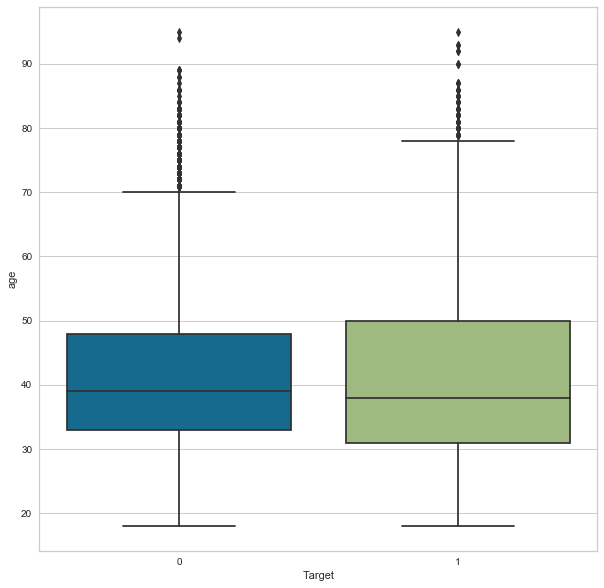

In [3287]:
plt.figure(figsize = (10, 10))
sns.boxplot( df['Target'], df['age']);

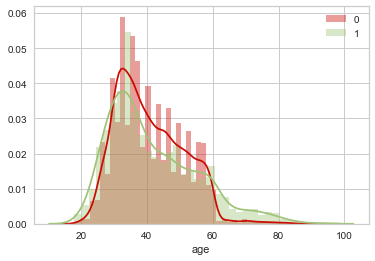

In [3288]:
sns.distplot(df[df['Target']==0]['age'],color='r',label=0)
sns.distplot(df[df['Target']==1]['age'],color='g',label=1)
plt.legend()
plt.show()

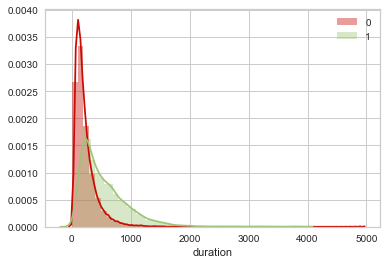

In [3289]:
sns.distplot(df[df['Target']==0]['duration'],color='r',label=0)
sns.distplot(df[df['Target']==1]['duration'],color='g',label=1)
plt.legend()
plt.show()

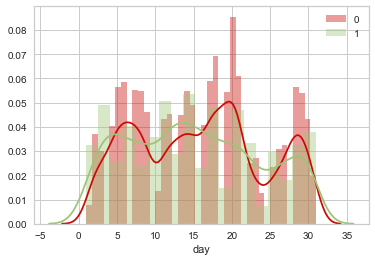

In [3290]:
sns.distplot(df[df['Target']==0]['day'],color='r',label=0)
sns.distplot(df[df['Target']==1]['day'],color='g',label=1)
plt.legend()
plt.show()

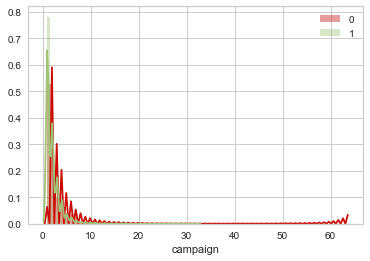

In [3291]:
sns.distplot(df[df['Target']==0]['campaign'],color='r',label=0)
sns.distplot(df[df['Target']==1]['campaign'],color='g',label=1)
plt.legend()
plt.show()

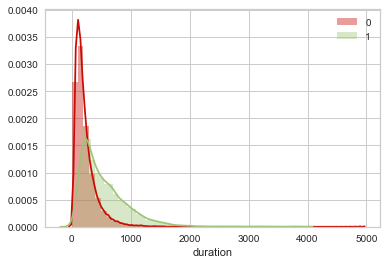

In [3292]:
sns.distplot(df[df['Target']==0]['duration'],color='r',label=0)
sns.distplot(df[df['Target']==1]['duration'],color='g',label=1)
plt.legend()
plt.show()

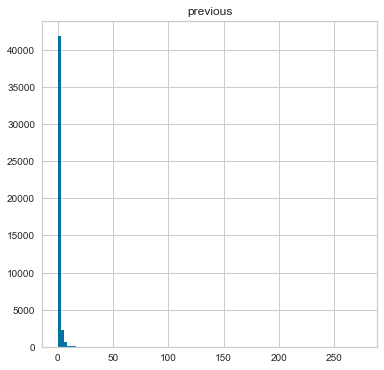

In [3293]:
df[['previous']].hist(stacked=False, bins=100, figsize=(6,6), layout=(1,1));

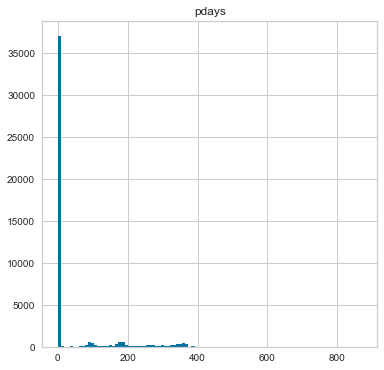

In [3294]:
df[['pdays']].hist(stacked=False, bins=100, figsize=(6,6), layout=(1,1));

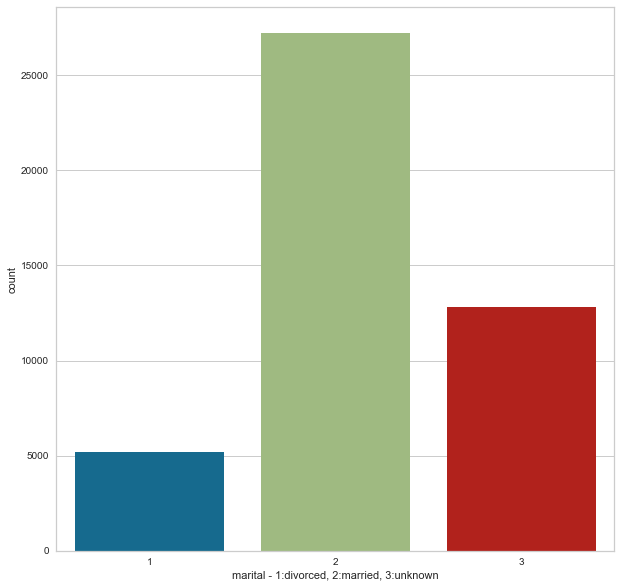

In [3295]:
plt.figure(figsize = (10, 10))
sns.countplot(df['marital']);
plt.xlabel("marital - 1:divorced, 2:married, 3:unknown")
plt.show()

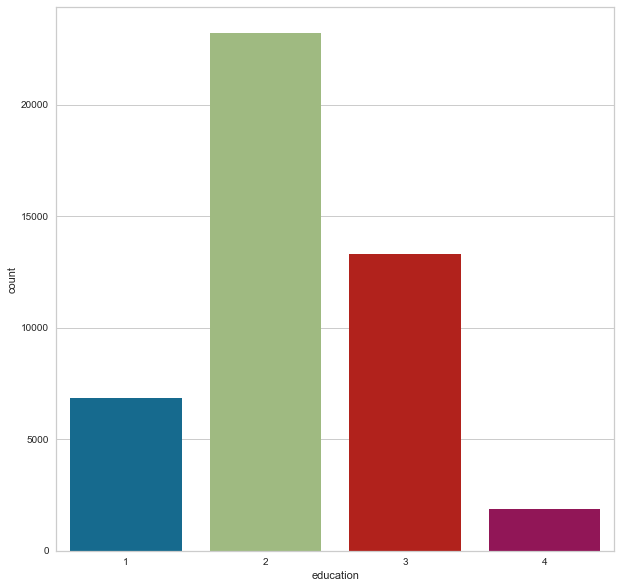

In [3296]:
plt.figure(figsize = (10, 10))
sns.countplot(df['education']);
plt.show()

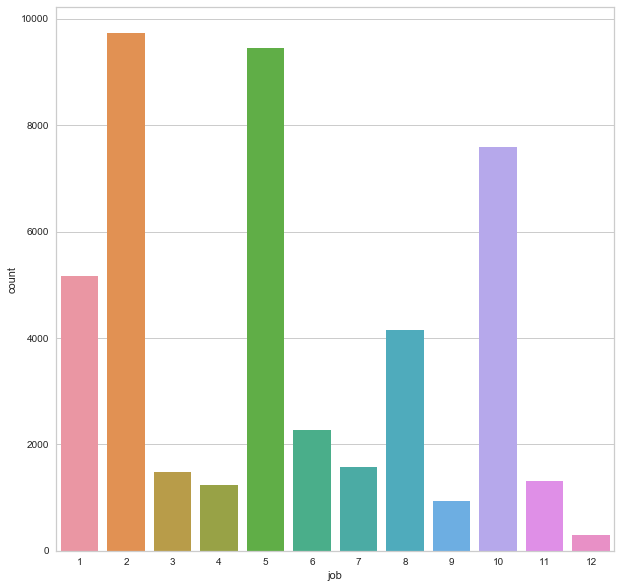

In [3297]:
plt.figure(figsize = (10, 10))
sns.countplot(df['job']);
plt.show()

0   88.30
1   11.70
Name: Target, dtype: float64



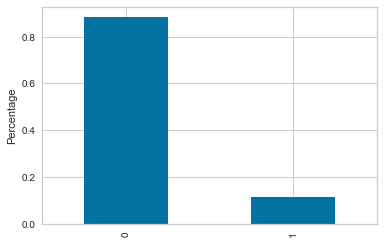

In [3298]:
print(df['Target'].value_counts(normalize=True)*100)
print()
df['Target'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel("Percentage")
plt.show()

## b. Strategies to address the different data challenges

## Data pollution

In [3299]:
#duration = this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#df = df.drop('duration', axis =1 ) 
#df.head()

In [3300]:
df[df.duration == 0].shape # There a no many of them to effect the results, so ignored

(3, 17)

## Outlier's treatment

In [3301]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16,2.76,40.20,0.58
std,10.62,3044.77,257.53,3.10,100.13,2.30
min,18.00,-8019.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,4918.00,63.00,871.00,275.00


In [3302]:
Q1_age = df.age.quantile(0.25)
Q3_age = df.age.quantile(0.75)
Q1_age, Q3_age

(33.0, 48.0)

In [3303]:
IQR_age = Q3_age -Q1_age
IQR_age

15.0

In [3304]:
lower_limit_age = Q1_age - 1.5*IQR_age
upper_limit_age = Q3_age + 1.5*IQR_age
lower_limit_age, upper_limit_age

(10.5, 70.5)

In [3305]:
df[(df.age < lower_limit_age) | (df.age > upper_limit_age)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,6,2,1,1,425,1,1,2,2,4,912,1,-1,0,4,0
29261,75,6,1,1,1,46,1,1,1,2,4,294,1,-1,0,4,0
29263,75,6,2,1,1,3324,1,1,1,2,4,149,1,-1,0,4,0
29322,83,6,2,3,1,6236,1,1,1,2,4,283,2,-1,0,4,0
29865,75,6,1,1,1,3881,2,1,1,4,4,136,3,-1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,6,2,2,1,2064,1,1,1,9,10,379,2,92,3,1,0
45191,75,6,1,3,1,3810,2,1,1,16,10,262,1,183,1,1,1
45204,73,6,2,2,1,2850,1,1,1,17,10,300,1,40,8,1,1
45207,71,6,1,1,1,1729,1,1,1,17,10,456,2,-1,0,4,1


In [3306]:
df = df[(df.age > lower_limit_age) &(df.age < upper_limit_age)]
df.head()
df.shape

(44724, 17)

In [3307]:
Q1_balance = df.balance.quantile(0.25)
Q3_balance = df.balance.quantile(0.75)
Q1_balance, Q3_balance

(71.0, 1408.0)

In [3308]:
IQR_balance = Q3_balance -Q1_balance
IQR_balance

1337.0

In [3309]:
lower_limit_balance = Q1_balance - 1.5*IQR_balance
upper_limit_balance = Q3_balance + 1.5*IQR_balance
lower_limit_balance, upper_limit_balance

(-1934.5, 3413.5)

In [3310]:
df[(df.balance < lower_limit_balance) | (df.balance > upper_limit_balance)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,5,2,3,1,10635,2,1,3,5,9,336,1,-1,0,4,0
65,51,5,2,3,1,6530,2,1,3,5,9,91,1,-1,0,4,0
69,35,2,3,2,1,12223,2,2,3,5,9,177,1,-1,0,4,0
70,57,2,2,2,1,5935,2,2,3,5,9,258,1,-1,0,4,0
186,40,8,1,4,1,4384,2,1,3,5,9,315,1,-1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45156,37,5,2,3,1,3556,1,1,1,9,10,268,1,-1,0,4,1
45159,60,8,2,2,1,4428,1,1,1,9,10,125,1,96,6,1,0
45164,35,8,2,3,1,4655,1,1,1,9,10,111,2,-1,0,4,0
45181,46,2,2,2,1,6879,1,1,1,15,10,74,2,118,3,1,0


In [3311]:
df = df[(df.balance > lower_limit_balance) &(df.balance < upper_limit_balance)]
df.head()
df.shape

(40028, 17)

In [3312]:
Q1_campaign = df.campaign.quantile(0.25)
Q3_campaign = df.campaign.quantile(0.75)
Q1_campaign, Q3_campaign

(1.0, 3.0)

In [3313]:
IQR_campaign = Q3_campaign -Q1_campaign
IQR_campaign

2.0

In [3314]:
lower_limit_campaign = Q1_campaign - 1.5*IQR_campaign
upper_limit_campaign = Q3_campaign + 1.5*IQR_campaign
lower_limit_campaign, upper_limit_campaign

(-2.0, 6.0)

In [3315]:
df[(df.campaign < lower_limit_campaign) | (df.campaign > upper_limit_campaign)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
758,59,8,2,2,1,307,2,2,3,6,9,250,7,-1,0,4,0
780,30,1,2,2,1,4,1,1,3,7,9,172,8,-1,0,4,0
906,27,8,3,2,1,0,2,1,3,7,9,388,7,-1,0,4,0
1103,52,10,2,4,1,133,2,1,3,7,9,253,8,-1,0,4,0
1105,43,1,2,3,1,1924,2,1,3,7,9,244,7,-1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44594,34,10,3,3,1,2481,1,1,1,23,2,220,16,192,14,2,0
44666,25,10,3,2,1,1298,1,1,1,2,12,206,7,94,2,2,0
44680,27,7,3,3,1,560,1,1,2,3,12,543,9,465,2,1,0
44770,37,8,3,3,1,1189,1,1,1,13,12,323,9,199,4,2,1


In [3316]:
df = df[(df.campaign > lower_limit_campaign) & (df.campaign < upper_limit_campaign)]
df.head()
df.shape

(36143, 17)

## c. comments regarding the steps you take and insights drawn from the plots

* There are categorical variable which are converted to numerical data from string data
* The continous variables are skewed (There are outliers, but the outliers seems to be plausible)
* There is a lot of variance that can be observed from above plots

## 2. Multivariate analysis

## a. Bi-variate analysis 

## between the predictor variables and target column

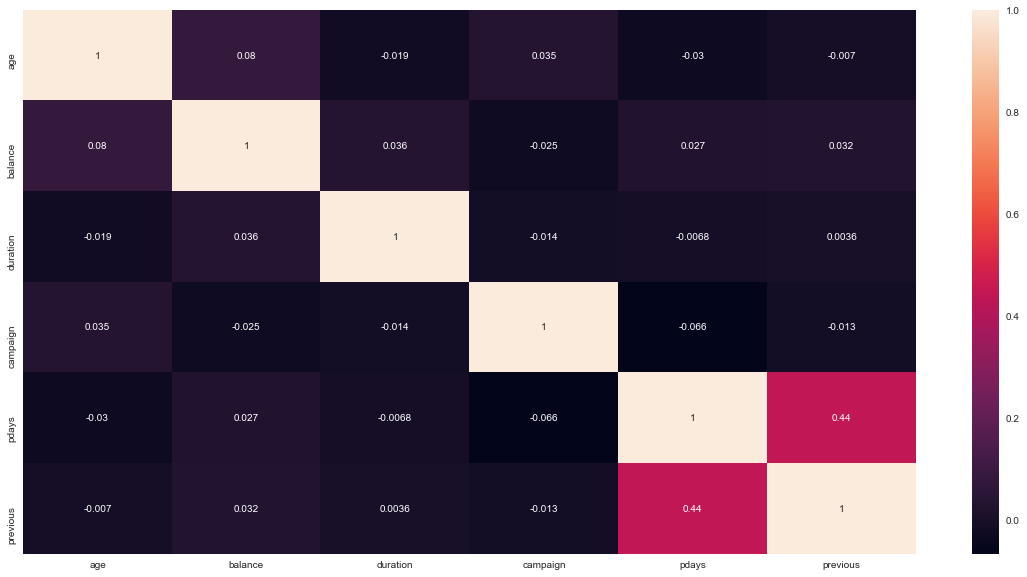

In [3317]:
# Let's see the correlation matrix
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True);

In [3318]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,0
1,44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,0
2,33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,0
3,47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,0
4,33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,0


In [3319]:
#sns.pairplot(df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays']], diag_kind='kde', height=3, aspect=1)

## Comment on your findings in terms of thier relationship and degree of relation if any

* All the independent variables seems to be highly independent and there is no strong correlation
* There is midway correlation between pdays and previous, which seems to be plausible

## Visualize the analysis using boxplots and pair plots, histograms or density curves.

* Please find them above

## Select the most appropriate attributes

In [3320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36143 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        36143 non-null  int64   
 1   job        36143 non-null  category
 2   marital    36143 non-null  category
 3   education  36143 non-null  category
 4   default    36143 non-null  category
 5   balance    36143 non-null  int64   
 6   housing    36143 non-null  category
 7   loan       36143 non-null  category
 8   contact    36143 non-null  category
 9   day        36143 non-null  category
 10  month      36143 non-null  category
 11  duration   36143 non-null  int64   
 12  campaign   36143 non-null  int64   
 13  pdays      36143 non-null  int64   
 14  previous   36143 non-null  int64   
 15  poutcome   36143 non-null  category
 16  Target     36143 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.3 MB


In [3321]:
df.shape

(36143, 17)

In [3322]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,0
1,44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,0
2,33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,0
3,47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,0
4,33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,0
5,35,5,2,3,1,231,2,1,3,5,9,139,1,-1,0,4,0
6,28,5,3,3,1,447,2,2,3,5,9,217,1,-1,0,4,0
7,42,3,1,3,2,2,2,1,3,5,9,380,1,-1,0,4,0
8,58,6,2,1,1,121,2,1,3,5,9,50,1,-1,0,4,0
9,43,10,3,2,1,593,2,1,3,5,9,55,1,-1,0,4,0


In [3323]:
# Creating a dummy variable for the variable 'job' and droping the first one.
job = pd.get_dummies(df['job'], prefix='job')
df = pd.concat([df, job], axis = 1)

mar = pd.get_dummies(df['marital'], prefix='marital')
df = pd.concat([df, mar], axis = 1)

edu = pd.get_dummies(df['education'], prefix='education')
df = pd.concat([df, edu], axis = 1)

default = pd.get_dummies(df['default'], prefix='default')
df = pd.concat([df, default], axis = 1)

housing = pd.get_dummies(df['housing'], prefix='housing')
df = pd.concat([df, housing], axis = 1)

loan = pd.get_dummies(df['loan'], prefix='loan')
df = pd.concat([df, loan], axis = 1)

contact = pd.get_dummies(df['contact'], prefix='contact')
df = pd.concat([df, contact], axis = 1)

day = pd.get_dummies(df['day'], prefix='day')
df = pd.concat([df, day], axis = 1)

month = pd.get_dummies(df['month'], prefix='month')
df = pd.concat([df, month], axis = 1)

poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')
df = pd.concat([df, poutcome], axis = 1)

df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome'], 1)

In [3324]:
df.head()

,age,balance,duration,campaign,pdays,previous,Target,job_1,job_2,job_3,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## b. Comments regarding the steps you take and insights drawn from the plots

In [ ]:
* Some of the independent variables exhibit non-linearity
* All the independent variables seems to be highly independent and there is no strong correlation

# -> Prepare the data for analytics

## 1. Ensure the attribute types are correct. If not, take appropriate actions

* This has already been taken care above

## 2. Get the data model ready

In [3325]:
## Define X and Y variables
X = df.drop('Target', axis=1)
y = df[['Target']]
X.head()

,age,balance,duration,campaign,pdays,previous,job_1,job_2,job_3,job_4,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## 3. Transform the data i.e. scale/normalize if required

* It is not required to normalize data in Ensemble techniques

## 4. Create the training set and test set in ration of 70:30

In [3326]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# -> Create the ensemble model

## 1. Model Creation

## Logistic Regression

In [3327]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3328]:
y_predict = logreg.predict(X_test)

In [3329]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8990513833992095

Testing accuracy 0.8955086230747948

Confusion Matrix


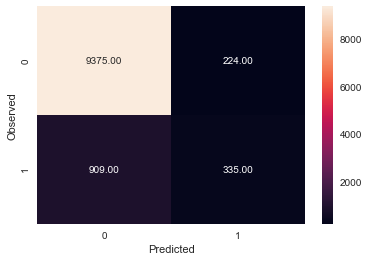

None

Recall: 0.2692926045016077

Precision: 0.5992844364937389

F1 Score: 0.37160288408208536

Roc Auc Score: 0.6229784201797548


In [3330]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [3331]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold

accuracy = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X,y)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X, y):
    print("Train", train_index, "Validation:", test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    logreg = LogisticRegression(random_state=42)
    logreg.fit(X1_train, y1_train)
    y_predict = logreg.predict(X1_test)
    score = logreg.score(X1_test, y1_test)
    accuracy.append(score)

print(accuracy)

Train [ 3287  3288  3289 ... 36140 36141 36142] Validation: [    0     1     2 ... 10811 10825 10845]
Train [    0     1     2 ... 36140 36141 36142] Validation: [ 3287  3288  3289 ... 17153 17156 17169]
Train [    0     1     2 ... 36140 36141 36142] Validation: [ 6608  6609  6610 ... 24536 24537 24544]
Train [    0     1     2 ... 36140 36141 36142] Validation: [ 9971  9972  9973 ... 26923 26929 26931]
Train [    0     1     2 ... 36140 36141 36142] Validation: [13390 13391 13392 ... 30886 30891 30903]
Train [    0     1     2 ... 36140 36141 36142] Validation: [16812 16813 16814 ... 32658 32659 32662]
Train [    0     1     2 ... 36140 36141 36142] Validation: [20177 20179 20180 ... 33769 33770 33771]
Train [    0     1     2 ... 36140 36141 36142] Validation: [23573 23575 23576 ... 34570 34574 34575]
Train [    0     1     2 ... 36140 36141 36142] Validation: [27420 27421 27422 ... 35309 35310 35312]
Train [    0     1     2 ... 35309 35310 35312] Validation: [30872 30873 30874 ...

In [3332]:
np.array(accuracy).mean()

0.8821051910466521

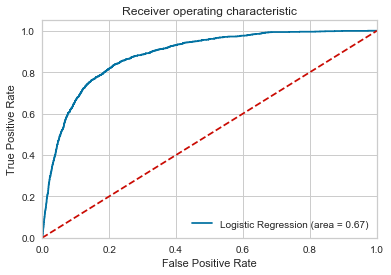

In [3333]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [3334]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()

Trainig accuracy 0.9020553359683795

Testing accuracy 0.8974453564511666



In [3335]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.228406
         Iterations 12


In [3336]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [3337]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
previous,0.04,1.04,0.51,0.01
duration,0.00,1.00,0.50,0.00
balance,0.00,1.00,0.50,0.00
campaign,-0.17,0.84,0.46,0.00


## Decision Tree algorithm

In [3338]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [3339]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [3340]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [3341]:
model_entropy.score(X_test, y_test)  # performance on test data

0.874481232131329

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [3342]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [3343]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = df.drop('Target', axis=1)
feature_cols = xvar.columns

In [3344]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [3345]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8981831596421654
0.9046245059288538


### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [3346]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.53
poutcome_3,0.34
contact_3,0.12
contact_1,0.01
day_18,0.00
...,...
default_2,0.00
default_1,0.00
education_4,0.00
education_3,0.00


In [3347]:
#accuracy results
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90


## Model performance by using different matrices

## Confusion Matrix (Precision/Recall and F1 score)

In [3348]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [3349]:
# Visualize model performance with yellowbrick library
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8893  706]
 [ 650  594]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9599
           1       0.46      0.48      0.47      1244

    accuracy                           0.87     10843
   macro avg       0.69      0.70      0.70     10843
weighted avg       0.88      0.87      0.88     10843



In [3350]:
import yellowbrick
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

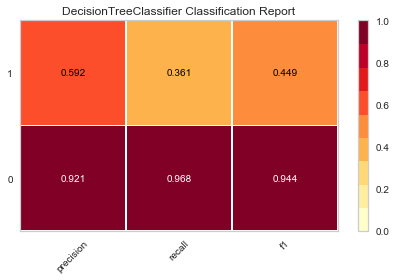

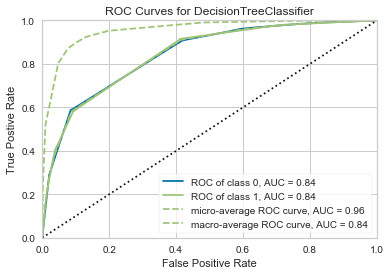

In [3351]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 2. Bagging and Boosting

## Bagging

In [3352]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [3353]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [3354]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Bagging,0.90


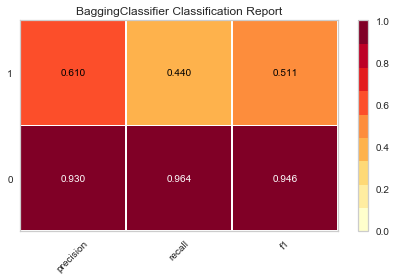

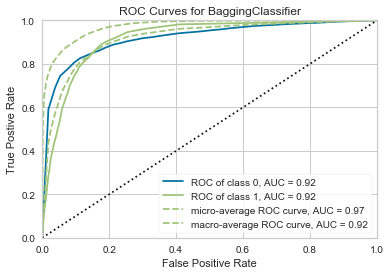

In [3355]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Bagging with Random Forests Classifier

In [3356]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [3357]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [3358]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Bagging,0.90
0,Random Forest,0.90


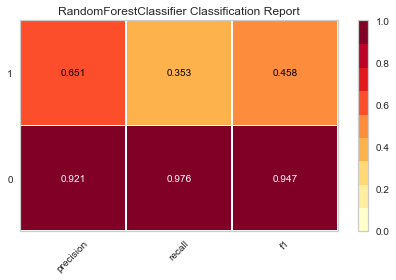

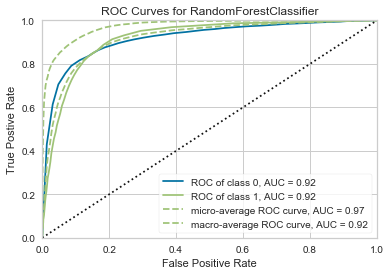

In [3359]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Boosting with Ada Boosting

In [3360]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [3361]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [3362]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Bagging,0.90
0,Random Forest,0.90
0,Adaboost,0.90


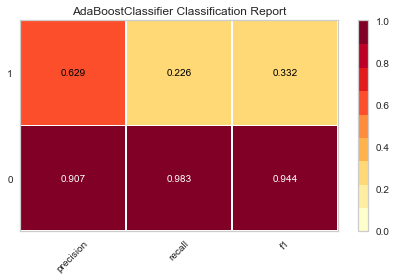

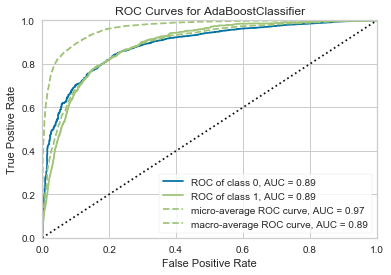

In [3363]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Boosting with Gradient Boost

In [3364]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [3365]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [3366]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Bagging,0.90
0,Random Forest,0.90
0,Adaboost,0.90
0,Gradient Boost,0.90


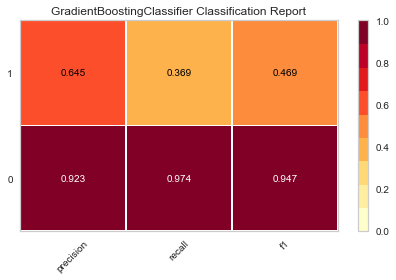

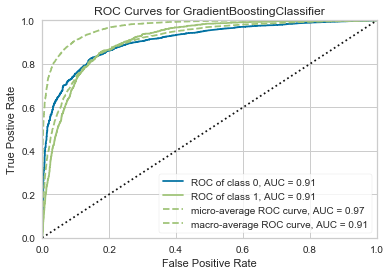

In [3367]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 3. Data frame to compare models and their metrices

In [3369]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

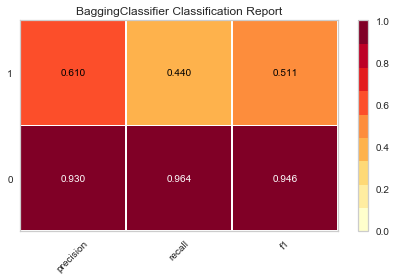

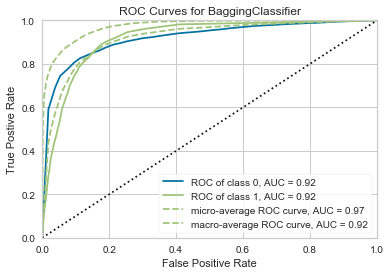

In [3373]:
visClassifierResults(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))

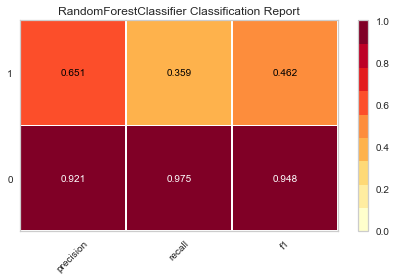

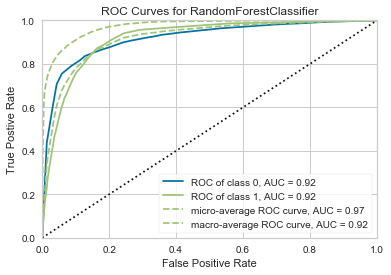

In [3374]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))

## Conclusion regarding the best algorithm and reson behind it

* Bagging classifier is best algorithm out of above algorithms tested for the case problem
* As it can be seen from the EDA uni and bivariate plots there is a lot of variance in the data set. Employing the bagging classifier here helped us to reduce the variance. Here, additional data for training is generated from original dataset using combinations with repetitions to produce multisets of the same size of original data. I have tried using stratified K-Fold on the target variable to reduce the bias, but that has not improved my results. So, I conclude Bagging classifier is best algorithm for given case. It can also be seen from the confusion matrix that F1 score is better that the rest.
* Comparing to classical methods such logistic regression bagging algorithm performs much better even when the individual variables are exhibiting non linearity nature